## **Graphs of Results**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/GitHub/dissertation

Mounted at /content/drive
/content/drive/MyDrive/GitHub/dissertation


In [2]:
!pip install scikit-garden
!pip install scikit-learn==0.21.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 317 kB 6.8 MB/s 
  Created wheel for scikit-garden: filename=scikit_garden-0.1.3-cp37-cp37m-linux_x86_64.whl size=671886 sha256=30acc0aa1d75815247333e758d356cbccde2202acdfc6c78babc23db9b1904f1
  Stored in directory: /root/.cache/pip/wheels/10/06/27/3687df098199aadafad4cb3061bd59e86d3e4bb7428edd0d66
Successfully built scikit-garden
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.7 MB 7.0 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requi

In [3]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
np.warnings.filterwarnings('ignore')
import pandas as pd
from cqr import helper
from nonconformist.nc import RegressorNc
from nonconformist.cp import IcpRegressor
from nonconformist.nc import QuantileRegErrFunc
import timeit
import random
import torch
from scipy.stats import binom, beta, betabinom
from statsmodels.distributions.empirical_distribution import ECDF

cqr_color = '#1f77b4'
beta_binom_color = '#ff7f0e'
beta_color =  '#d62728'
qrf_color =  '#2ca02c'

%matplotlib inline

seed = 23

# save figures and runs?
save_figures = True

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.

## **Synthetic example graphs**

In [8]:
output = pd.read_csv("Experiments Output/toy3_s23_R1000.csv")
n_train = 1000
n_cal = 1000
n_test = 5000


"""
output_cqr = pd.read_csv("Experiments Output/toy2_cqr_s23_R1000.csv")
output_cqr = pd.read_csv("Experiments Output/toy1_cqr_s23_R1000.csv")
output_qrf = pd.read_csv("Experiments Output/toy_qrf_s23_R1000.csv")
"""

# desired tolerance region 
eps = 0.1
delta = 0.1

# desired expected miscoverage error
alpha = (max(np.where(binom.cdf(range(n_cal), n_cal, eps)<=delta)[-1])+1)/(n_cal+1)

# low and high target quantiles
quantiles = [100*alpha/2, 100*(1-alpha/2)]

In [9]:
print("CQR: Avg of sample of coverages is (Expected ", (1-alpha)*100,"): ", np.mean(output.iloc[:, 0]))
print("QRF: Avg of sample of coverages is (Expected ", (1-alpha)*100,"): ", np.mean(output.iloc[:, 3]))
print("CQR: Delta quantile of sample of coverages is (Expected just below ", 100*(1-eps),"): ", np.quantile(output.iloc[:, 0], delta))
print("QRF: Delta quantile of sample of coverages is (Expected just below ", 100*(1-eps),"): ", np.quantile(output.iloc[:, 3], delta))
print("Epsilon quantile of BetaBinom distribution is: ", betabinom.ppf(eps, n_test, np.ceil((n_cal+1)*(1-alpha)), np.floor(alpha*(n_cal+1)))/n_test*100)
print("CQR: Pct below Epsilon quantile of BetaBin is (Expected just below ", delta,"): ", sum(output.iloc[:, 0]<=betabinom.ppf(eps, n_test, np.ceil((n_cal+1)*(1-alpha)), np.floor(alpha*(n_cal+1)))/n_test*100)/len(output.iloc[:, 0]))
print("QRF: Pct below Epsilon quantile of BetaBin is (Expected just below ", delta,"): ", sum(output.iloc[:, 3]<=betabinom.ppf(eps, n_test, np.ceil((n_cal+1)*(1-alpha)), np.floor(alpha*(n_cal+1)))/n_test*100)/len(output.iloc[:, 3]))
print("CQR: Pct below 1 - Epsilon (Expected just above ", delta,"): ", (sum(output.iloc[:, 0]<=(1-eps)*100)/len(output.iloc[:, 0])))
print("QRF: Pct below 1 - Epsilon (Expected just above ", delta,"): ", (sum(output.iloc[:, 3]<=(1-eps)*100)/len(output.iloc[:, 3])))
print("CQR: Avg of sample of interval lengths is: ", np.mean(output.iloc[:, 1]))
print("QRF: Avg of sample of interval lengths is: ", np.mean(output.iloc[:, 4]))

CQR: Avg of sample of coverages is (Expected  91.20879120879121 ):  91.22522000000001
QRF: Avg of sample of coverages is (Expected  91.20879120879121 ):  90.5694
CQR: Delta quantile of sample of coverages is (Expected just below  90.0 ):  90.0
QRF: Delta quantile of sample of coverages is (Expected just below  90.0 ):  89.78
Epsilon quantile of BetaBinom distribution is:  89.94
CQR: Pct below Epsilon quantile of BetaBin is (Expected just below  0.1 ):  0.092
QRF: Pct below Epsilon quantile of BetaBin is (Expected just below  0.1 ):  0.152
CQR: Pct below 1 - Epsilon (Expected just above  0.1 ):  0.103
CQR: Pct below 1 - Epsilon (Expected just above  0.1 ):  0.185
CQR: Avg of sample of interval lengths is:  2.1041237931480947
QRF: Avg of sample of interval lengths is:  2.428771584499398


In [22]:
def hist_cov(
    output = output,
    n_cal = 1000,
    eps = 0.1,
    alpha = 0.05,
    save_figures = False,
    filename = None):
  
  cov_cqr = output.iloc[:, 0]
  cov_qrf = output.iloc[:, 3]

  x = np.arange(betabinom.ppf(0.01, n_test, np.ceil((n_cal+1)*(1-alpha)), np.floor(alpha*(n_cal+1))),
              betabinom.ppf(0.99, n_test, np.ceil((n_cal+1)*(1-alpha)), np.floor(alpha*(n_cal+1))))
  z = np.linspace(beta.ppf(0.01, np.ceil((n_cal+1)*(1-alpha)), np.floor(alpha*(n_cal+1))),
                  beta.ppf(0.99, np.ceil((n_cal+1)*(1-alpha)), np.floor(alpha*(n_cal+1))), 100)

  plt.plot(x/n_test*100, n_test/100*betabinom.pmf(x, n_test, np.ceil((n_cal+1)*(1-alpha)), np.floor(alpha*(n_cal+1))), color=beta_binom_color, alpha=0.9, linewidth=3, label=u'BetaBin')
  plt.plot(z*100, beta.pdf(z, np.ceil((n_cal+1)*(1-alpha)), np.floor(alpha*(n_cal+1)))/100, color=beta_color, alpha=0.9, linewidth=3, label=u'Beta')
  plt.axvline(100*(1-alpha), color='black', linestyle=':', linewidth=3, alpha=0.9, label=u'1 - Alpha')
  plt.axvline(100*(1-eps), color='black', linestyle='--', linewidth=3, alpha=0.9, label=u'1 - Epsilon')
  plt.hist(cov_qrf, bins=25, density=True, color=qrf_color, alpha=0.75, label=u'QRF')
  plt.hist(cov_cqr, bins=25, density=True, color=cqr_color, alpha=0.75, label=u'CQR')
  plt.xlabel('Coverage (%)')
  plt.ylabel('Probability')
  plt.legend(loc='upper left')
  if save_figures and (filename is not None):
    plt.savefig(filename, bbox_inches='tight', dpi=300)
  plt.show()
 
def ecdf_cov(
    output = output,
    eps = 0.1,
    delta = 0.1,
    alpha = 0.05,
    save_figures = False,
    filename = None):
  
  cov_cqr = output.iloc[:, 0]
  cov_qrf = output.iloc[:, 3]

  ecdf_cov_cqr = ECDF(cov_cqr)
  ecdf_cov_qrf = ECDF(cov_qrf)
  plt.plot(ecdf_cov_cqr.x, ecdf_cov_cqr.y, lw=3, color=cqr_color, alpha=0.9, label=u'CQR')
  plt.plot(ecdf_cov_qrf.x, ecdf_cov_qrf.y, lw=3, color=qrf_color, alpha=0.9, label=u'QRF')
  plt.axvline(100*(1-alpha), color='black', linestyle=':', linewidth=3, alpha=0.9, label=u'1 - Alpha')
  plt.axvline(100*(1-eps), color='black', linestyle='--', linewidth=3, alpha=0.9, label=u'1 - Epsilon')
  plt.axhline(delta, color='black', linestyle='-.', linewidth=3, alpha=0.9, label=u'Delta')
  plt.xlabel('Coverage (%)')
  plt.ylabel('Cumulative Probability')
  plt.legend(loc='upper left')
  if save_figures and (filename is not None):
    plt.savefig(filename, bbox_inches='tight', dpi=300)
  plt.show()

def hist_length(
    output = output,
    save_figures = False,
    filename = None):
  
  length_cqr = output.iloc[:, 1]
  length_qrf = output.iloc[:, 4]

  plt.hist(length_qrf, bins=25, color=qrf_color, alpha=0.75, label=u'QRF')
  plt.hist(length_cqr, bins=10, color=cqr_color, alpha=0.75, label=u'CQR')
  plt.xlabel('Average Interval Length')
  plt.ylabel('Count')
  plt.legend(loc='upper right')
  if save_figures and (filename is not None):
    plt.savefig(filename, bbox_inches='tight', dpi=300)
  plt.show()

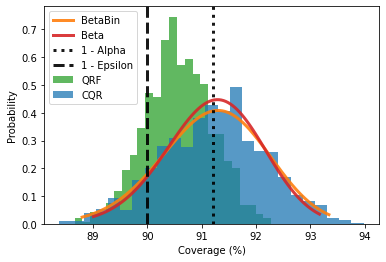

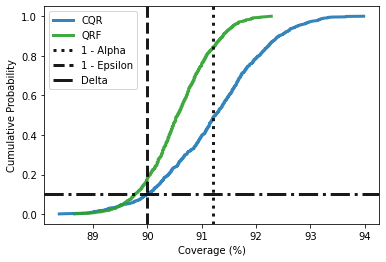

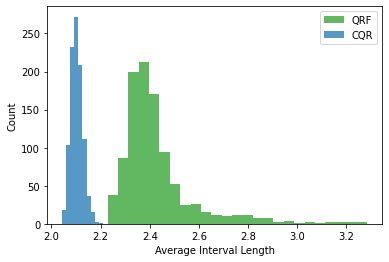

In [23]:
hist_cov(
    output = output,
    n_cal = n_cal,
    eps = eps,
    alpha = alpha,
    save_figures = True,
    filename = "Images/toy_R_hist_cov.png")

ecdf_cov(
    output = output,
    eps = eps,
    delta = delta,
    alpha = alpha,
    save_figures = True,
    filename = "Images/toy_R_ecdf_cov.png")

hist_length(
    output = output,
    save_figures = True,
    filename = "Images/toy_R_hist_length.png")

## **Real data Tables**

In [32]:
"""
output_cqr = pd.concat([pd.read_csv("Experiments Output/concrete_cqr_s23_R1000.csv"),
                        pd.read_csv("Experiments Output/concrete_cqr_s19_R1000.csv"),
                        pd.read_csv("Experiments Output/concrete_cqr_s17_R1000.csv"),
                        pd.read_csv("Experiments Output/concrete_cqr_s13_R1000.csv"),
                        pd.read_csv("Experiments Output/concrete_cqr_s11_R1000.csv"),
                        pd.read_csv("Experiments Output/concrete_cqr_s7_R1000.csv"),
                        pd.read_csv("Experiments Output/concrete_cqr_s5_R1000.csv"),
                        pd.read_csv("Experiments Output/concrete_cqr_s3_R1000.csv"),
                        pd.read_csv("Experiments Output/concrete_cqr_s2_R1000.csv"),
                        pd.read_csv("Experiments Output/concrete_cqr_s1_R1000.csv")], 
                       axis=0)
"""
output_cqr = pd.concat([pd.read_csv("Experiments Output/concrete_cqr_s5_R1000.csv")], 
                       axis=0)
n_train = 412
n_cal = 412
n_test = 206
"""
output_cqr = pd.concat([pd.read_csv("Experiments Output/toy1_s23_R1000.csv"),
                        pd.read_csv("Experiments Output/toy1_s19_R1000.csv"),
                        pd.read_csv("Experiments Output/toy1_s17_R1000.csv"),
                        pd.read_csv("Experiments Output/toy1_s13_R1000.csv"),
                        pd.read_csv("Experiments Output/toy1_s11_R1000.csv"),
                        pd.read_csv("Experiments Output/toy1_s7_R1000.csv"),
                        pd.read_csv("Experiments Output/toy1_s5_R1000.csv"),
                        pd.read_csv("Experiments Output/toy1_s3_R1000.csv"),
                        pd.read_csv("Experiments Output/toy1_s2_R1000.csv"),
                        pd.read_csv("Experiments Output/toy1_s1_R1000.csv")], 
                       axis=0)
n_train = 1000
n_cal = 1000
n_test = 5000


output_cqr = pd.concat([pd.read_csv("Experiments Output/bike_cqr_s23_R1000.csv"),
                        pd.read_csv("Experiments Output/bike_cqr_s7_R1000.csv")],
                       axis=0)
n_train = 4354
n_cal = 4354
n_test = 2178

output_cqr = pd.concat([pd.read_csv("Experiments Output/star_cqr_s23_R1000.csv"),
                        pd.read_csv("Experiments Output/star_cqr_s19_R1000.csv"),
                        pd.read_csv("Experiments Output/star_cqr_s17_R1000.csv"),
                        pd.read_csv("Experiments Output/star_cqr_s13_R1000.csv"),
                        pd.read_csv("Experiments Output/star_cqr_s11_R1000.csv"),
                        pd.read_csv("Experiments Output/star_cqr_s7_R1000.csv"),
                        pd.read_csv("Experiments Output/star_cqr_s5_R1000.csv"),
                        pd.read_csv("Experiments Output/star_cqr_s3_R1000.csv"),
                        pd.read_csv("Experiments Output/star_cqr_s2_R1000.csv"),
                        pd.read_csv("Experiments Output/star_cqr_s1_R1000.csv")], 
                       axis=0)
n_train = 864
n_cal = 864
n_test = 433

output_cqr = pd.concat([pd.read_csv("Experiments Output/community_cqr_s23_R1000.csv"),
                        pd.read_csv("Experiments Output/community_cqr_s19_R1000.csv"),
                        pd.read_csv("Experiments Output/community_cqr_s17_R1000.csv"),
                        pd.read_csv("Experiments Output/community_cqr_s13_R1000.csv"),
                        pd.read_csv("Experiments Output/community_cqr_s11_R1000.csv"),
                        pd.read_csv("Experiments Output/community_cqr_s7_R1000.csv"),
                        pd.read_csv("Experiments Output/community_cqr_s5_R1000.csv"),
                        pd.read_csv("Experiments Output/community_cqr_s3_R1000.csv"),
                        pd.read_csv("Experiments Output/community_cqr_s2_R1000.csv"),
                        pd.read_csv("Experiments Output/community_cqr_s1_R1000.csv")], 
                       axis=0)
n_train = 797
n_cal = 797
n_test = 400



"""


# desired tolerance region 
eps = 0.1
delta = 0.1

# desired expected miscoverage error
alpha = (max(np.where(binom.cdf(range(n_cal), n_cal, eps)<=delta)[-1])+1)/(n_cal+1)

# low and high target quantiles
quantiles = [100*alpha/2, 100*(1-alpha/2)]

print("CQR: Avg of sample of coverages is (Expected ", (1-alpha)*100,"): ", np.mean(output_cqr.iloc[:, 0]))
print("CQR: Delta quantile of sample of coverages is (Expected just below ", 100*(1-eps),"): ", np.quantile(output_cqr.iloc[:, 0], delta))
print("CQR: Pct below 1 - Epsilon (Expected just above ", delta,"): ", (sum(output_cqr.iloc[:, 0]<=(1-eps)*100)/len(output_cqr.iloc[:, 0])))
print("Epsilon quantile of BetaBinom distribution is: ", betabinom.ppf(eps, n_test, np.ceil((n_cal+1)*(1-alpha)), np.floor(alpha*(n_cal+1)))/n_test*100)
print("CQR: Pct below Epsilon quantile of BetaBin dist is (Expected just below ", delta,"): ", sum(output_cqr.iloc[:, 0]<=betabinom.ppf(eps, n_test, np.ceil((n_cal+1)*(1-alpha)), np.floor(alpha*(n_cal+1)))/n_test*100)/len(output_cqr.iloc[:, 0]))
print("CQR: Avg of sample of interval lengths is: ", np.mean(output_cqr.iloc[:, 1]))


CQR: Avg of sample of coverages is (Expected  92.00968523002422 ):  91.92815533980583
CQR: Delta quantile of sample of coverages is (Expected just below  90.0 ):  88.83495145631069
CQR: Pct below 1 - Epsilon (Expected just above  0.1 ):  0.196
Epsilon quantile of BetaBinom distribution is:  88.83495145631069
CQR: Pct below Epsilon quantile of BetaBin dist is (Expected just below  0.1 ):  0.116
CQR: Avg of sample of interval lengths is:  1.0547011346445083


## **Real data graphs**

In [91]:
output_cqr = pd.read_csv("Experiments Output/toy1_s23_R1000.csv")
n_train = 1000
n_cal = 1000
n_test = 5000

"""
output_cqr = pd.read_csv("Experiments Output/community_cqr_asym_s23_R1000.csv")


output_cqr = pd.read_csv("Experiments Output/concrete_cqr_s23_R1000.csv")
n_train = 412
n_cal = 412
n_test = 206

output_cqr = pd.read_csv("Experiments Output/star_cqr_s23_R1000.csv")
n_train = 864
n_cal = 864
n_test = 433

output_cqr = pd.read_csv("Experiments Output/bike_cqr_s23_R1000.csv")

n_train = 4354
n_cal = 4354
n_test = 2178

output_cqr = pd.read_csv("Experiments Output/community_cqr_s23_R1000.csv")
n_train = 797
n_cal = 797
n_test = 400


output_qrf = pd.read_csv("Experiments Output/star_qrf_s23_R100.csv")
output_qrf = pd.read_csv("Experiments Output/community_qrf_s23_R100.csv")
output_qrf = pd.read_csv("Experiments Output/concrete_qrf_s23_R100.csv")

"""

# desired tolerance region 
eps = 0.1
delta = 0.1

# desired expected miscoverage error
alpha = (max(np.where(binom.cdf(range(n_cal), n_cal, eps)<=delta)[-1])+1)/(n_cal+1)

# low and high target quantiles
quantiles = [100*alpha/2, 100*(1-alpha/2)]

In [92]:
def hist_cov(
    output_cqr = output_cqr,
#    output_qrf = output_qrf,
    n_cal = 1000,
    eps = 0.1,
    alpha = 0.05,
    save_figures = False,
    filename = None):
  
  cov_cqr = output_cqr.iloc[:, 0]
#  cov_qrf = output_qrf.iloc[:, 0]

  x = np.arange(betabinom.ppf(0.01, n_test, np.ceil((n_cal+1)*(1-alpha)), np.floor(alpha*(n_cal+1))),
              betabinom.ppf(0.99, n_test, np.ceil((n_cal+1)*(1-alpha)), np.floor(alpha*(n_cal+1))))
  z = np.linspace(beta.ppf(0.01, np.ceil((n_cal+1)*(1-alpha)), np.floor(alpha*(n_cal+1))),
                  beta.ppf(0.99, np.ceil((n_cal+1)*(1-alpha)), np.floor(alpha*(n_cal+1))), 100)

#  plt.hist(cov_qrf, bins=25, density=True, color=qrf_color, alpha=0.75, label=u'QRF')
  plt.hist(cov_cqr, bins=25, density=True, color=cqr_color, alpha=0.75, label=u'CQR')
  plt.plot(x/n_test*100, n_test/100*betabinom.pmf(x, n_test, np.ceil((n_cal+1)*(1-alpha)), np.floor(alpha*(n_cal+1))), color=beta_binom_color, alpha=0.9, linewidth=3, label=u'BetaBin')
  plt.plot(z*100, beta.pdf(z, np.ceil((n_cal+1)*(1-alpha)), np.floor(alpha*(n_cal+1)))/100, color=beta_color, alpha=0.9, linewidth=3, label=u'Beta')
  plt.axvline(100*(1-alpha), color='black', linestyle=':', linewidth=3, alpha=0.9, label=u'1 - Alpha')
  plt.axvline(100*(1-eps), color='black', linestyle='--', linewidth=3, alpha=0.9, label=u'1 - Epsilon')
  #plt.xlim([86, 96])
  #plt.ylim([0.00, 0.45])
  plt.xlabel('Coverage (%)')
  plt.ylabel('Probability')
  plt.legend(loc='upper left')
  if save_figures and (filename is not None):
    plt.savefig(filename, bbox_inches='tight', dpi=300)
  plt.show()
 
def ecdf_cov(
    output_cqr = output_cqr,
#    output_qrf = output_qrf,
    eps = 0.1,
    delta = 0.1,
    alpha = 0.05,
    save_figures = False,
    filename = None):
  
  cov_cqr = output_cqr.iloc[:, 0]
#  cov_qrf = output_qrf.iloc[:, 0]

  ecdf_cov_cqr = ECDF(cov_cqr)
#  ecdf_cov_qrf = ECDF(cov_qrf)
  plt.plot(ecdf_cov_cqr.x, ecdf_cov_cqr.y, linewidth=3, color=cqr_color, alpha=0.9, label=u'CQR')
#  plt.plot(ecdf_cov_qrf.x, lw=3, ecdf_cov_qrf.y, color=qrf_color, alpha=0.9, label=u'QRF')
  plt.axvline(100*(1-alpha), color='black', linestyle=':', linewidth=3, alpha=0.9, label=u'1 - Alpha')
  plt.axvline(100*(1-eps), color='black', linestyle='--', linewidth=3, alpha=0.9, label=u'1 - Epsilon')
  plt.axhline(delta, color='black', linestyle='-.', linewidth=3, alpha=0.9, label=u'Delta')
  #plt.axvline(betabinom.ppf(delta, n_test, np.ceil((n_cal+1)*(1-alpha)), np.floor(alpha*(n_cal+1)))/n_test*100, color='black', linestyle='-', linewidth=2, alpha=0.9, label=u'Delta Qntl BetaBin')
  #plt.xlim([86, 96])
  plt.xlabel('Coverage (%)')
  plt.ylabel('Cumulative Probability')
  plt.legend(loc='upper left')
  if save_figures and (filename is not None):
    plt.savefig(filename, bbox_inches='tight', dpi=300)
  plt.show()

def hist_length(
    output_cqr = output_cqr,
#    output_qrf = output_qrf,
    save_figures = False,
    filename = None):
  
  length_cqr = output_cqr.iloc[:, 1]
#  length_qrf = output_qrf.iloc[:, 1]

#  plt.hist(length_qrf, bins=25, color=qrf_color, alpha=0.75, label=u'QRF')
  plt.hist(length_cqr, bins=25, color=cqr_color, alpha=0.75, label=u'CQR')
  #plt.ylim([0, 150])
  plt.xlabel('Average Interval Length')
  plt.ylabel('Count')
  plt.legend(loc='upper right')
  if save_figures and (filename is not None):
    plt.savefig(filename, bbox_inches='tight', dpi=300)
  plt.show()

CQR: Avg of sample of coverages is (Expected  91.20879120879121 ):  91.22522000000001
CQR: Delta quantile of sample of coverages is (Expected just below  90.0 ):  90.0
CQR: Pct below 1 - Epsilon (Expected just above  0.1 ):  0.103
Epsilon quantile of BetaBinom distribution is:  89.94
CQR: Pct below Epsilon quantile of BetaBin dist is (Expected just below  0.1 ):  0.092
CQR: Avg of sample of interval lengths is:  2.1041237931480947


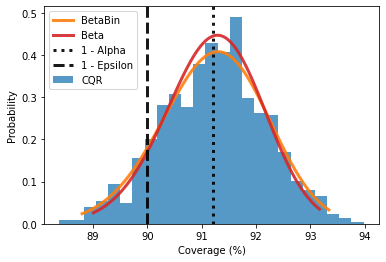

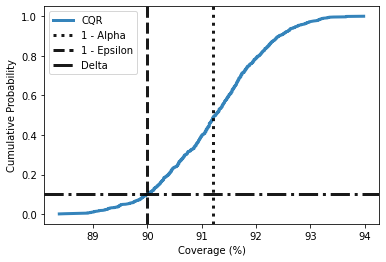

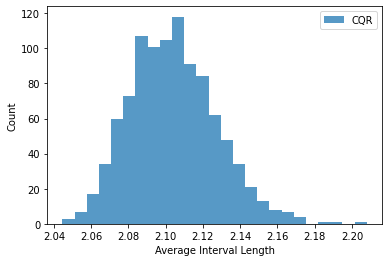

In [95]:
hist_cov(
    output_cqr = output_cqr,
#    output_qrf = output_qrf,
    n_cal = n_cal,
    eps = eps,
    alpha = alpha,
    save_figures = True,
    filename = "Images/toy_hist_cov.png")

ecdf_cov(
    output_cqr = output_cqr,
#    output_qrf = output_qrf,
    eps = eps,
    delta = delta,
    alpha = alpha,
    save_figures = True,
    filename = "Images/toy_ecdf_cov.png")

hist_length(
    output_cqr = output_cqr,
#    output_qrf = output_qrf,
    save_figures = True,
    filename = "Images/toy_hist_length.png")

## **Table Generator**

In [ ]:
np.arange(0,1,0.00001)[min(np.where(binom.cdf(ell-1, n, np.arange(0,1,0.00001))<=delta)[-1], default=0)]

0.00134

In [ ]:
for delta in [0.1, 0.05, 0.01, 0.005, 0.001]:
  for n in [100,1000,10000,100000]:
    for alpha in [0.1, 0.05, 0.01, 0.005, 0.001]:
      ell = np.floor(alpha*(n+1))
      print(round(np.arange(0,1,0.000001)[min(np.where(binom.cdf(ell-1, n, np.arange(0,1,0.000001))<=delta)[-1], default=0)], 6)*100)  

13.8352
7.8348
2.2763
0.0
0.0
11.2204
5.8943
1.417
0.7978000000000001
0.22999999999999998
10.3851
5.2807
1.1294
0.5922000000000001
0.1421
10.1217
5.0885
1.0406
0.5288
0.1131
15.179599999999999
8.9197
2.9514
0.0
0.0
11.5925
6.1759
1.5653000000000001
0.9129999999999999
0.29919999999999997
10.4969
5.3629999999999995
1.169
0.6214
0.157
10.1564
5.1139
1.0523
0.5373
0.117
17.874699999999997
11.1705
4.5008
0.0
0.0
12.309299999999999
6.7258
1.8692
1.1561
0.4595
10.7086
5.5197
1.2457
0.6784
0.1878
10.2218
5.161700000000001
1.0747
0.5534
0.1248
18.9153
12.0633
5.1605
0.0
0.0
12.5777
6.9343
1.9889000000000001
1.2541
0.5285
10.7866
5.5777
1.2745
0.7002
0.1999
10.2458
5.1792
1.0829
0.5594
0.12769999999999998
21.1466
14.0166
6.6746
0.0
0.0
13.1414
7.376099999999999
2.2504
1.4715
0.6884
10.9487
5.6986
1.3354
0.7463
0.2265
10.2954
5.2155
1.1001
0.5718
0.1338


In [ ]:
for eps in [0.1, 0.05, 0.01, 0.005, 0.001]:
  for n in [100,1000,10000,100000]:
    for delta in [0.1, 0.05, 0.01, 0.005, 0.001]:
      print(round((max(np.where(binom.cdf(range(n), n, eps)<=delta)[-1], default=0)+1)/(n+1), 6)*100)  

5.9406
4.9505
3.9604
2.9703
1.9802
8.7912
8.4915
7.8921
7.5924000000000005
7.192800000000001
9.619
9.508999999999999
9.309099999999999
9.229099999999999
9.0791
9.8789
9.8439
9.7799
9.7559
9.7079
1.9802
1.9802
0.9901
0.9901
0.9901
4.0959
3.8961
3.4965
3.2967000000000004
2.997
4.7195
4.6395
4.4996
4.4496
4.3396
4.912
4.887
4.84
4.823
4.788
0.9901
0.9901
0.9901
0.9901
0.9901
0.5994
0.49950000000000006
0.2997
0.2997
0.19980000000000003
0.8699
0.8399
0.7799
0.7499
0.7099
0.96
0.9490000000000001
0.928
0.9199999999999999
0.9039999999999999
0.9901
0.9901
0.9901
0.9901
0.9901
0.19980000000000003
0.19980000000000003
0.09990000000000002
0.09990000000000002
0.09990000000000002
0.41000000000000003
0.38999999999999996
0.33999999999999997
0.33
0.3
0.47200000000000003
0.464
0.449
0.443
0.43299999999999994
0.9901
0.9901
0.9901
0.9901
0.9901
0.09990000000000002
0.09990000000000002
0.09990000000000002
0.09990000000000002
0.09990000000000002
0.06
0.05
0.03
0.03
0.02
0.087
0.084
0.078
0.075
0.0710000000000